In [1]:
mashr_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/mashr/MASHR_july_2020/NeuroSeq_BRAIN_iPSC/"

In [3]:
list.files(mashr_dir)

[1] "MASHR_local_false_sign_rate_sc_brain.txt"       
[2] "MASHR_posterior_mean_sc_brain.txt"              
[3] "MASHR_posterior_standard_deviation_sc_brain.txt"

In [4]:
sign_res = paste0(mashr_dir,"MASHR_local_false_sign_rate_sc_brain.txt")
mean_beta = paste0(mashr_dir,"MASHR_posterior_mean_sc_brain.txt")
std_beta = paste0(mashr_dir,"MASHR_posterior_standard_deviation_sc_brain.txt")

In [ ]:
tissue_samplesize = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/mashr/tissueSampleSize_v7.txt"

In [54]:
library(reshape2)
library(ggplot2)

In [55]:
##Functions
reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd,method="complete")
  cormat <-cormat[hc$order, hc$order]
}

In [6]:
get_upper_tri <- function(cormat){
  cormat[upper.tri(cormat)]<- NA
  return(cormat)
}

In [ ]:
# "The posterior distributions also yield a condition-specific measure of significance for each effect, 
# the local false sign rate, or lfsr16, which is analogous to a false discovery rate, 
# but more stringent because it requires true discoveries to be not only nonzero, but also correctly signed."

In [7]:
# local false sign rate (lfsr)
lfsrMat = read.delim(sign_res,as.is=T, row.names=1)
posteriorMean = read.delim(mean_beta,as.is=T, row.names=1)

In [8]:
nrow(lfsrMat)

[1] 8706

In [9]:
head(lfsrMat)

,iPSC,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,...,iPSC.pool1_13_noddd_D30.Epen1,iPSC.pool1_13_noddd_D30.Sert,iPSC.qtl_results_NONE_Astro_all,iPSC.qtl_results_NONE_DA_all,iPSC.qtl_results_NONE_Epen1_all,iPSC.qtl_results_NONE_Sert_all,iPSC.qtl_results_ROT_Astro_all,iPSC.qtl_results_ROT_DA_all,iPSC.qtl_results_ROT_Epen1_all,iPSC.qtl_results_ROT_Sert_all
1_100291080_C_T-ENSG00000156875,6.425719e-01,4.612314e-01,5.050905e-01,4.943480e-01,6.667276e-01,6.345416e-01,5.292026e-01,6.079400e-01,5.309874e-01,4.729551e-01,...,0.6613520505,0.645672532,0.59074019,0.657531156,0.584986796,0.6027842676,0.564207778,0.5477064877,0.614331173,0.559126108
1_100373730_G_A-ENSG00000162688,1.268070e-03,1.402447e-02,1.945722e-03,4.432758e-04,6.350886e-06,1.743266e-05,3.027556e-03,6.145723e-02,3.762398e-03,3.436851e-01,...,0.3628307113,0.064193673,0.34483438,0.494831164,0.009088605,0.0466097964,0.111639160,0.4347433877,0.063268721,0.056066858
1_100543962_A_G-ENSG00000117620,2.424167e-07,6.588372e-04,2.712609e-04,7.016307e-04,1.366163e-05,1.823245e-04,8.905430e-08,1.698228e-03,4.523886e-03,5.026348e-05,...,0.0028172475,0.004148294,0.00552418,0.005016201,0.001473165,0.0039719350,0.003851257,0.0006614327,0.002144953,0.001950847
1_100578935_C_T-ENSG00000122435,5.555576e-01,5.006717e-01,4.182744e-01,4.070347e-01,1.723942e-01,1.785691e-01,3.525675e-01,3.865534e-01,4.624360e-01,4.544517e-01,...,0.4011837591,0.475887657,0.40222148,0.475394363,0.455316579,0.4865449529,0.471178865,0.5156878077,0.462251482,0.469786428
1_100617887_C_T-ENSG00000156876,3.534964e-05,1.075237e-01,1.461433e-02,1.094928e-02,4.180396e-03,4.946848e-03,9.570740e-02,4.455584e-02,3.483841e-02,7.858937e-02,...,0.0002194413,0.002568208,0.02231978,0.004495061,0.055018197,0.0000204054,0.285329536,0.0257668940,0.030913754,0.005347652
1_100713300_G_T-ENSG00000137992,2.516000e-04,2.359843e-08,1.312977e-07,3.161838e-07,4.600028e-09,1.608761e-09,2.392647e-09,2.106007e-08,7.578631e-08,1.684469e-09,...,0.1672069288,0.289129998,0.12483179,0.344116519,0.183286144,0.2570285463,0.097382971,0.2242717572,0.124799056,0.182784279


In [10]:
head(rownames(lsfrMat))
genes = gsub(".*-","",rownames(lsfrMat))
head(genes)

[1] "1_100291080_C_T-ENSG00000156875" "1_100373730_G_A-ENSG00000162688"
[3] "1_100543962_A_G-ENSG00000117620" "1_100578935_C_T-ENSG00000122435"
[5] "1_100617887_C_T-ENSG00000156876" "1_100713300_G_T-ENSG00000137992"

[1] "ENSG00000156875" "ENSG00000162688" "ENSG00000117620" "ENSG00000122435"
[5] "ENSG00000156876" "ENSG00000137992"

In [9]:
write.csv(genes, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/mashr/genes_expressed_in_all_tissues.csv")

In [11]:
colnames(lsfrMat)

[1] "iPSC"                                 
 [2] "Brain_Amygdala"                       
 [3] "Brain_Anterior_cingulate_cortex_BA24" 
 [4] "Brain_Caudate_basal_ganglia"          
 [5] "Brain_Cerebellar_Hemisphere"          
 [6] "Brain_Cerebellum"                     
 [7] "Brain_Cortex"                         
 [8] "Brain_Frontal_Cortex_BA9"             
 [9] "Brain_Hippocampus"                    
[10] "Brain_Hypothalamus"                   
[11] "Brain_Nucleus_accumbens_basal_ganglia"
[12] "Brain_Putamen_basal_ganglia"          
[13] "Brain_Spinal_cord_cervical_c.1"       
[14] "Brain_Substantia_nigra"               
[15] "Pituitary"                            
[16] "iPSC.pool1_13_noddd_D11.FPP"          
[17] "iPSC.pool1_13_noddd_D11.NB"           
[18] "iPSC.pool1_13_noddd_D11.P_FPP"        
[19] "iPSC.pool1_13_noddd_D30.Astro"        
[20] "iPSC.pool1_13_noddd_D30.DA"           
[21] "iPSC.pool1_13_noddd_D30.Epen1"        
[22] "iPSC.pool1_13_noddd_D30.Sert"         
[23] "iPSC.qtl_results_NONE_Astro_all"      
[24] "iPSC.qtl_results_NONE_DA_all"         
[25] "iPSC.qtl_results_NONE_Epen1_all"      
[26] "iPSC.qtl_results_NONE_Sert_all"       
[27] "iPSC.qtl_results_ROT_Astro_all"       
[28] "iPSC.qtl_results_ROT_DA_all"          
[29] "iPSC.qtl_results_ROT_Epen1_all"       
[30] "iPSC.qtl_results_ROT_Sert_all"

In [12]:
sampleSizeTissues = read.delim(tissue_samplesize,as.is=T, sep=",")
# sampleSizeTissues
# sampleSizeTissues = sampleSizeTissues[match(colnames(lsfrMat),(sampleSizeTissues$tissue)),]
# head(sampleSizeTissues)
# all(sampleSizeTissues$tissue == colnames(lsfrMat))
# sampleSizeTissues[match(colnames(lsfrMat),(sampleSizeTissues$tissue)),]

In [13]:
ratio = 2 # ratio of magnitude between 0.5 and 2 is "same signal"
lsfrThreshold = 0.05 # significance threshold
any = F       # at least one passing significance
both = T      # both passing significance
smallest = F  # smallest sample size set passing significance

In [14]:
sameSignMagnitude = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))# check sign thr + same sign + ratio 
sameSign = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))         # check sign thr + same sign
total = matrix(0, ncol=ncol(lsfrMat), nrow=ncol(lsfrMat))            # check only sign threshold

In [16]:
nrow(lsfrMat)

[1] 8706

In [19]:
options(warn=2)
if(sum(any, both, smallest)==1){
  for(colN in 1:ncol(lsfrMat)){
    for(colM in colN:ncol(lsfrMat)){
      if(any){
        toConsider = unique(c(which(lsfrMat[,colN]<lsfrThreshold),which(lsfrMat[,colM]<lsfrThreshold)))
      } else if(both) {
        toConsider = intersect(which(lsfrMat[,colN]<lsfrThreshold),which(lsfrMat[,colM]<lsfrThreshold))
      } else if(smallest){
        if(sampleSizeTissues$n[colN] > sampleSizeTissues$n[colM]){
          toConsider = which(lsfrMat[,colM]<lsfrThreshold)
        } else {
          toConsider = which(lsfrMat[,colN]<lsfrThreshold)
        }
      }
      total[colN,colM] = length(toConsider)
      total[colM,colN] = total[colN,colM]
      
      tmpInfo = posteriorMean[toConsider,colN]/posteriorMean[toConsider,colM] # check sign
      tmpInfo2 = tmpInfo[which(tmpInfo>0)]
      sameSign[colN,colM] = length(tmpInfo2)
      sameSign[colM,colN] = sameSign[colN,colM]
      
      tmpInfo2[which(tmpInfo2<1)] = 1/tmpInfo2[which(tmpInfo2<1)] # check magn ratio
      sameSignMagnitude[colN,colM] = length(which(tmpInfo2<=ratio))
      sameSignMagnitude[colM,colN] = sameSignMagnitude[colN,colM]
    }
  }
} else {
  print("Setting issue.")
}

In [20]:
# options(warn=1)

pairwiseSharingSign = sameSign/total # get fraction
pairwiseSharing = sameSignMagnitude/total

colnames(pairwiseSharing) = colnames(lsfrMat)
rownames(pairwiseSharing) = colnames(lsfrMat)
colnames(pairwiseSharingSign) = colnames(lsfrMat)
rownames(pairwiseSharingSign) = colnames(lsfrMat)

##Sign only
upper_tri <- get_upper_tri(reorder_cormat(as.matrix(pairwiseSharingSign)))
melted_cormat <- melt(upper_tri, na.rm = TRUE)
head(melted_cormat)

Var1,Var2,value
Brain_Spinal_cord_cervical_c.1,Brain_Spinal_cord_cervical_c.1,1.0000000
Brain_Substantia_nigra,Brain_Spinal_cord_cervical_c.1,0.9958712
Brain_Cerebellar_Hemisphere,Brain_Spinal_cord_cervical_c.1,0.9835206
Brain_Cerebellum,Brain_Spinal_cord_cervical_c.1,0.9782451
Pituitary,Brain_Spinal_cord_cervical_c.1,0.9876184
Brain_Cortex,Brain_Spinal_cord_cervical_c.1,0.9935760


In [21]:
# install.packages("ggthemes")

In [22]:
library(ggthemes)

In [23]:
col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

In [24]:
colnames(pairwiseSharingSign)

[1] "iPSC"                                 
 [2] "Brain_Amygdala"                       
 [3] "Brain_Anterior_cingulate_cortex_BA24" 
 [4] "Brain_Caudate_basal_ganglia"          
 [5] "Brain_Cerebellar_Hemisphere"          
 [6] "Brain_Cerebellum"                     
 [7] "Brain_Cortex"                         
 [8] "Brain_Frontal_Cortex_BA9"             
 [9] "Brain_Hippocampus"                    
[10] "Brain_Hypothalamus"                   
[11] "Brain_Nucleus_accumbens_basal_ganglia"
[12] "Brain_Putamen_basal_ganglia"          
[13] "Brain_Spinal_cord_cervical_c.1"       
[14] "Brain_Substantia_nigra"               
[15] "Pituitary"                            
[16] "iPSC.pool1_13_noddd_D11.FPP"          
[17] "iPSC.pool1_13_noddd_D11.NB"           
[18] "iPSC.pool1_13_noddd_D11.P_FPP"        
[19] "iPSC.pool1_13_noddd_D30.Astro"        
[20] "iPSC.pool1_13_noddd_D30.DA"           
[21] "iPSC.pool1_13_noddd_D30.Epen1"        
[22] "iPSC.pool1_13_noddd_D30.Sert"         
[23] "iPSC.qtl_results_NONE_Astro_all"      
[24] "iPSC.qtl_results_NONE_DA_all"         
[25] "iPSC.qtl_results_NONE_Epen1_all"      
[26] "iPSC.qtl_results_NONE_Sert_all"       
[27] "iPSC.qtl_results_ROT_Astro_all"       
[28] "iPSC.qtl_results_ROT_DA_all"          
[29] "iPSC.qtl_results_ROT_Epen1_all"       
[30] "iPSC.qtl_results_ROT_Sert_all"

In [59]:
mat_to_plot = pairwiseSharingSign[c(2:15),c(16:30,14)] 
head(mat_to_plot)

,iPSC.pool1_13_noddd_D11.FPP,iPSC.pool1_13_noddd_D11.NB,iPSC.pool1_13_noddd_D11.P_FPP,iPSC.pool1_13_noddd_D30.Astro,iPSC.pool1_13_noddd_D30.DA,iPSC.pool1_13_noddd_D30.Epen1,iPSC.pool1_13_noddd_D30.Sert,iPSC.qtl_results_NONE_Astro_all,iPSC.qtl_results_NONE_DA_all,iPSC.qtl_results_NONE_Epen1_all,iPSC.qtl_results_NONE_Sert_all,iPSC.qtl_results_ROT_Astro_all,iPSC.qtl_results_ROT_DA_all,iPSC.qtl_results_ROT_Epen1_all,iPSC.qtl_results_ROT_Sert_all,Brain_Substantia_nigra
Brain_Amygdala,0.8472337,0.8468354,0.8337490,0.8788136,0.8851240,0.8656331,0.8878661,0.8623596,0.8952618,0.8689772,0.8822540,0.8593895,0.8878924,0.8619469,0.8746803,0.9969372
Brain_Anterior_cingulate_cortex_BA24,0.8369565,0.8409639,0.8260530,0.8780876,0.8821705,0.8617021,0.8823058,0.8580413,0.8946553,0.8653226,0.8768864,0.8550088,0.8834459,0.8580968,0.8722539,0.9864356
Brain_Caudate_basal_ganglia,0.8316176,0.8391204,0.8215086,0.8727410,0.8787879,0.8614786,0.8779378,0.8593092,0.8859259,0.8631179,0.8733986,0.8581024,0.8808752,0.8562351,0.8668206,0.9854651
Brain_Cerebellar_Hemisphere,0.8171115,0.8284672,0.8069620,0.8590982,0.8649922,0.8435430,0.8672065,0.8328817,0.8754894,0.8401305,0.8575975,0.8328817,0.8664944,0.8371697,0.8490260,0.9612342
Brain_Cerebellum,0.8123587,0.8307873,0.8018223,0.8584759,0.8631498,0.8377510,0.8614786,0.8312611,0.8729198,0.8379447,0.8523077,0.8330435,0.8645921,0.8331957,0.8434304,0.9591680
Brain_Cortex,0.8321006,0.8455378,0.8196108,0.8726163,0.8735030,0.8596899,0.8802441,0.8539710,0.8899628,0.8641304,0.8753799,0.8542199,0.8803906,0.8543846,0.8661056,0.9824433


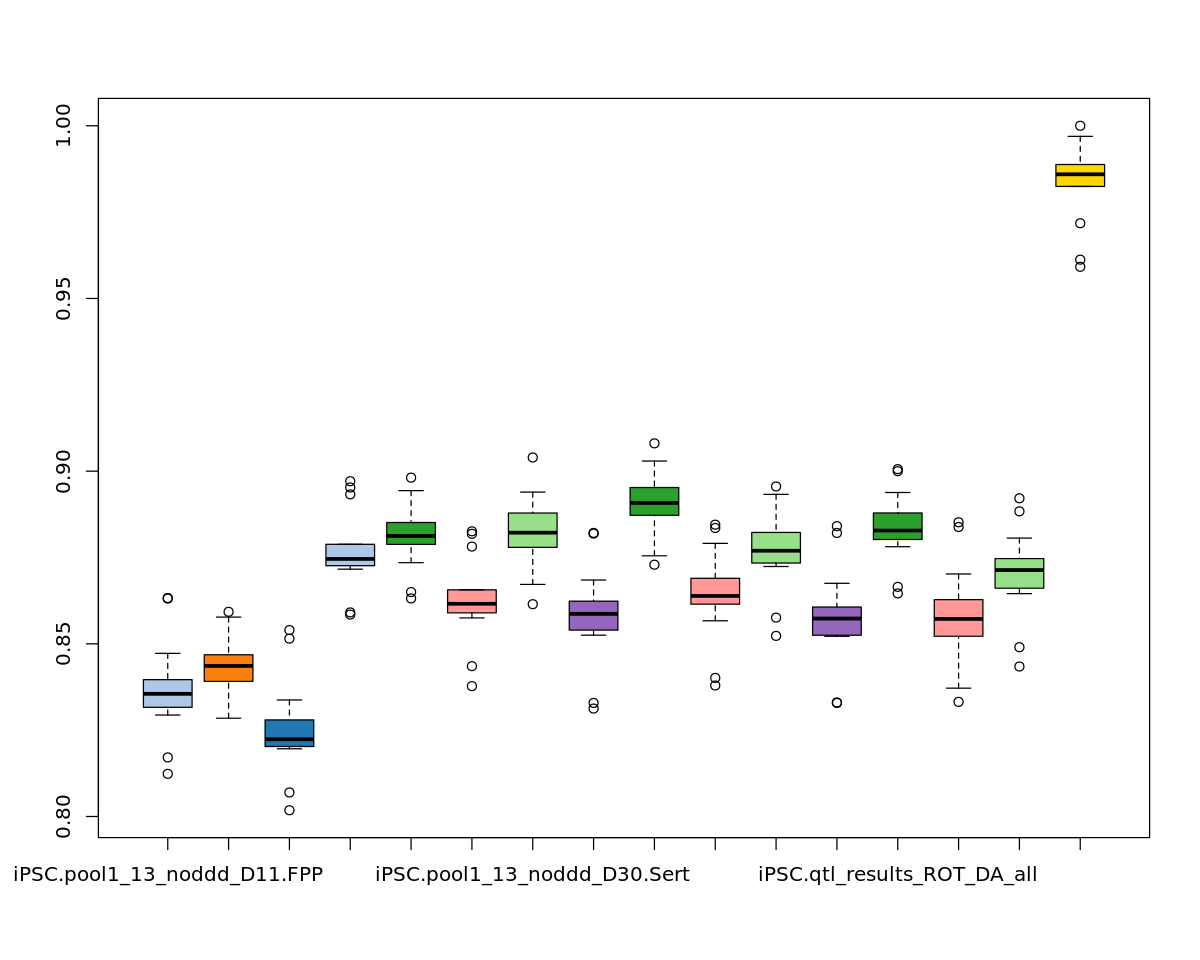

In [60]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot(mat_to_plot, col = c(
#                              col_ips,
                             col_FPP,col_NB,col_P_FPP,
                             col_FPP,col_DA,col_Epen1,col_Sert,
                             col_Astro,col_DA,col_Epen1,col_Sert,
                             col_Astro,col_DA,col_Epen1,col_Sert,
                            "gold"))

In [32]:
# library(tidyr)
# library(ggplot2)
# library(dplyr)
options(repr.plot.width=8, repr.plot.height=6)
df = as.data.frame(mat_to_plot) %>% 
  gather(key="CellType", value="Sharing")

head(df,2)

ERROR: Error in as.data.frame(mat_to_plot) %>% gather(key = "CellType", value = "Sharing"): could not find function "%>%"


In [ ]:
unique(df$CellType)[order(unique(df$CellType))]

In [ ]:
library(forcats)

In [ ]:
df %>% mutate(CellType = factor(CellType, levels=c("iPSC","iPSCsc",
                                     "pool1_13_noddd_D11_FPP","pool1_13_noddd_D11_P_FPP",
                                    "pool1_13_noddd_D30_Astro","pool1_13_noddd_D30_DA","pool1_13_noddd_D30_Sert",
                                    "pool1_13_noddd_D30_Epen1","pool1_17_D52_DA_Untreated",
                                    "pool1_17_D52_Sert_Untreated","pool1_17_D52_Epen1_Untreated",
                                                   "pool1_17_D52_Astro_Untreated","pool1_17_D52_DA_Treated",
                                    "pool1_17_D52_Sert_Treated","pool1_17_D52_Epen1_Treated",
                                                   "pool1_17_D52_Astro_Treated")))

In [ ]:
unique(df$CellType)
tail(df)

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + theme(legend.position = "none") 

In [ ]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_ips,col_ips,
                            col_FPP,col_P_FPP,col_NB,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + theme(legend.position = "none") 

In [ ]:
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_ips,col_ips,
                            col_FPP,col_NB,col_P_FPP,
                            col_Astro,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_Astro,
                            col_DA,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Epen1,
                            col_Sert,col_Sert,col_Sert)) + theme(legend.position = "none")

In [24]:
################

In [41]:
library(dplyr)
library(tidyr)

In [73]:
 nrow(pairwiseSharingSign)

[1] 71

In [148]:
# mat_to_plot = pairwiseSharingSign[c(29:41),c(52,2,4,6:12,14:15,17:18,20:21)]
mat_to_plot1 = pairwiseSharingSign[c(29:41),c(4,6:12,14:15,17:18,20:21)]
mat_to_plot2 = pairwiseSharingSign[c(42:51,53:71),c(4,6:12,14:15,17:18,20:21)]
# rownames(mat_to_plot)
# colnames(mat_to_plot)

In [155]:
df1 = as.data.frame(mat_to_plot1) %>% gather(key="CellType", value="Sharing")
df1$Tissue = "Brain"
df2 = as.data.frame(mat_to_plot2) %>% gather(key="CellType", value="Sharing")
df2$Tissue = "Other"
df = rbind(df1,df2)
df$comparison = paste0(df$CellType,"-",df$Tissue)
head(df,2)

CellType,Sharing,Tissue,comparison
pool1_13_noddd_D11_FPP,0.8888889,Brain,pool1_13_noddd_D11_FPP-Brain
pool1_13_noddd_D11_FPP,0.8809869,Brain,pool1_13_noddd_D11_FPP-Brain


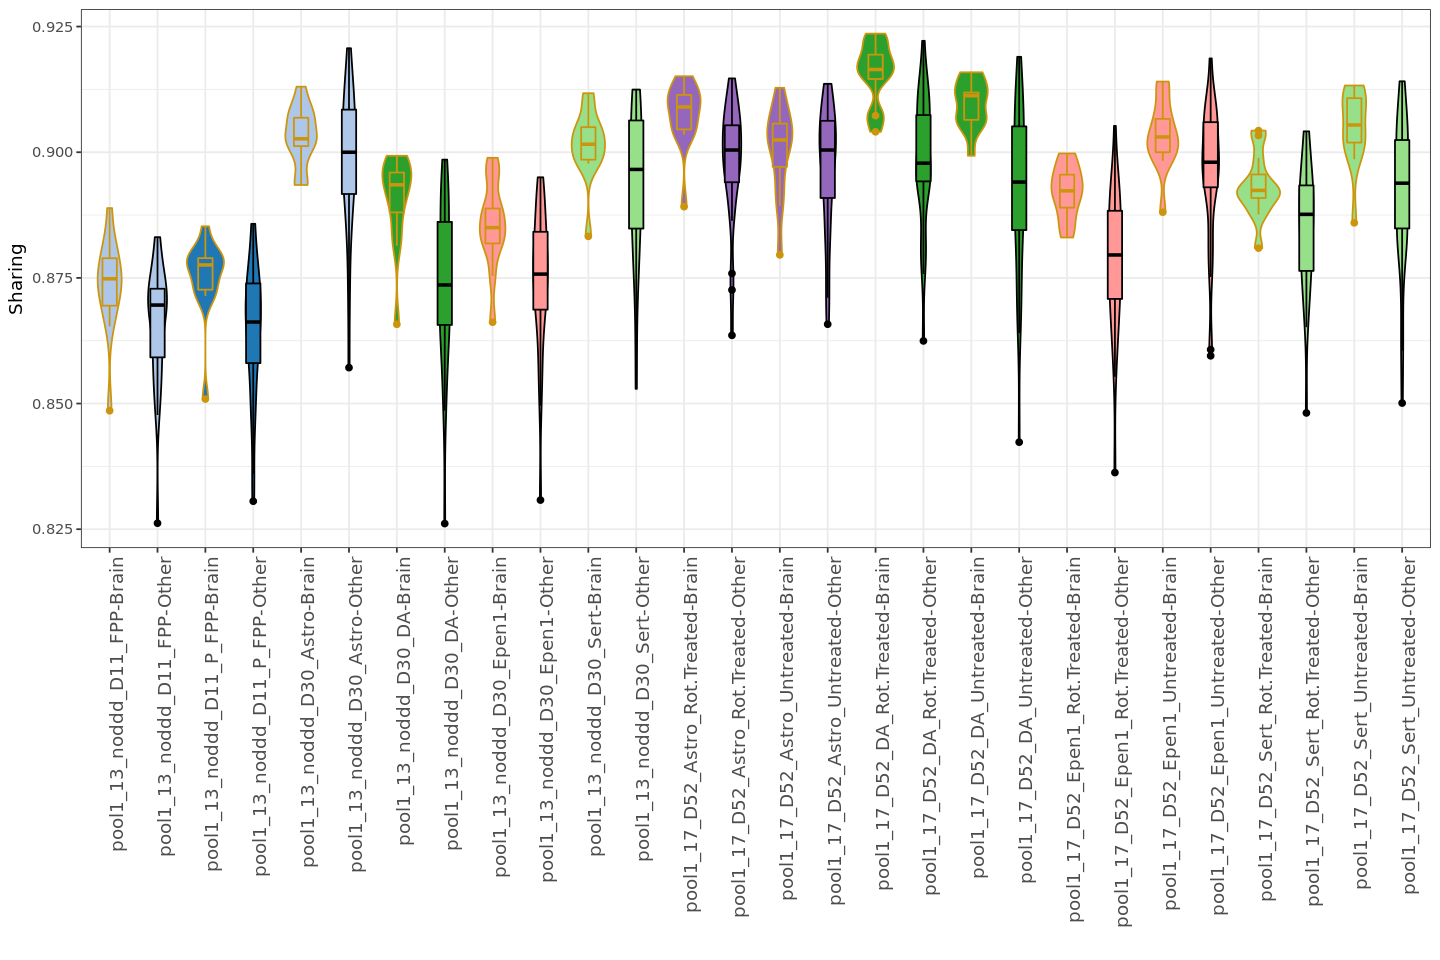

In [156]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df,aes(x=comparison, y=Sharing, fill=CellType, col = Tissue)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_colour_manual(values = c("darkgoldenrod3","black"))+
                scale_fill_manual(values = c(
#                     "gold","brown",
#                     col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Sert,col_Sert
                            ))+ 
theme_bw() + xlab("") + 
theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

In [61]:
options(repr.plot.width=8, repr.plot.height=6)
df = as.data.frame(mat_to_plot) %>% 
  gather(key="CellType", value="Sharing")

head(df,2)

CellType,Sharing
iPSC.pool1_13_noddd_D11.FPP,0.8472337
iPSC.pool1_13_noddd_D11.FPP,0.8369565


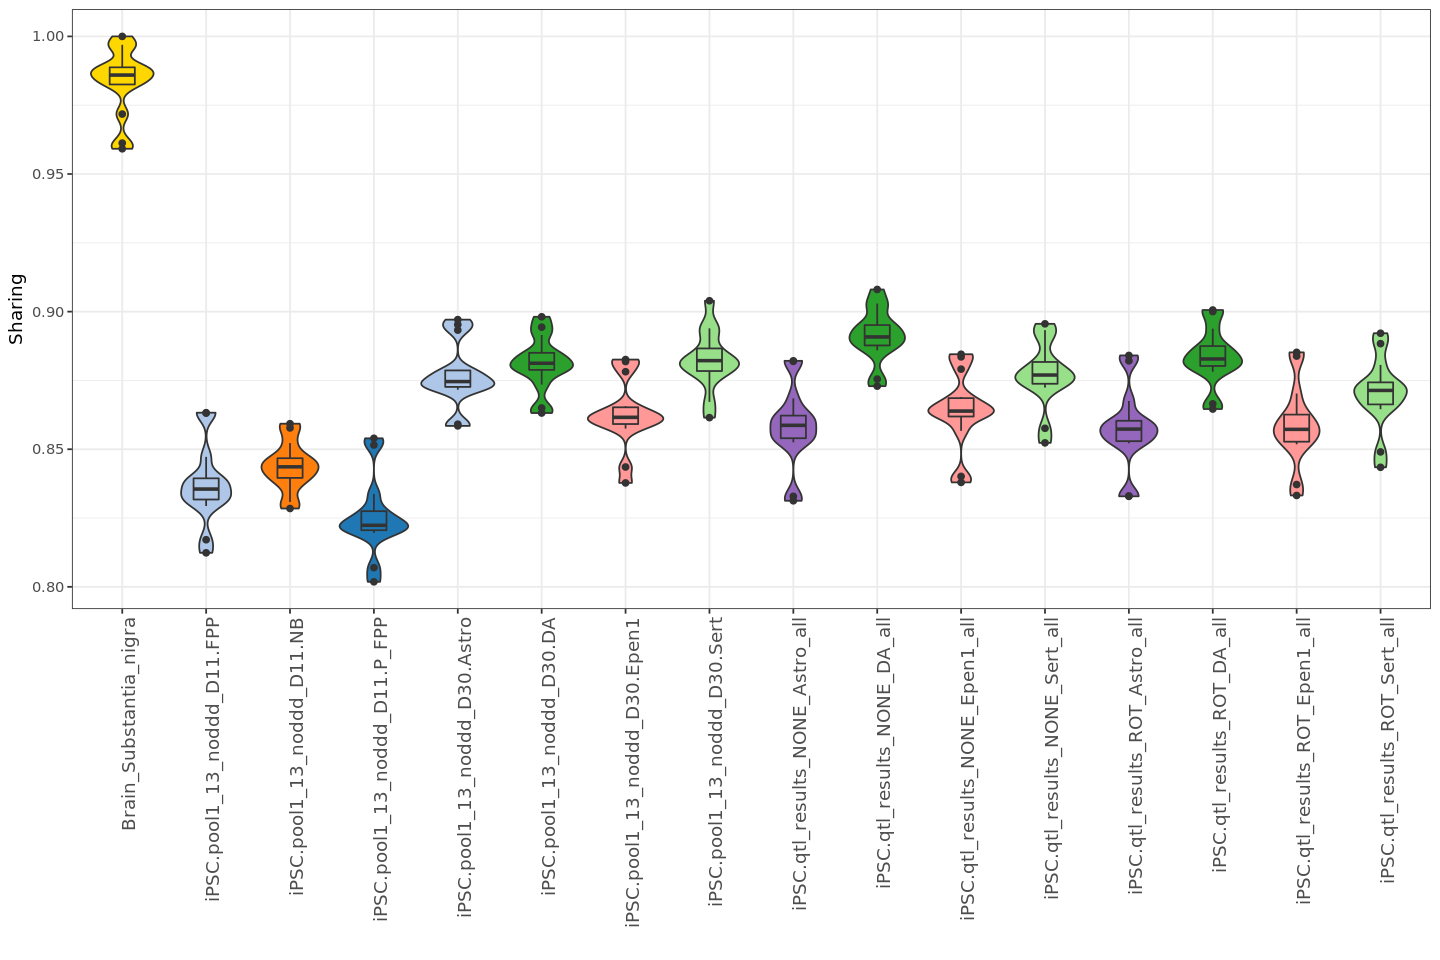

In [62]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(
                    "gold",
#                     "brown",
#                     col_ips,col_ips,
                            col_FPP,col_NB,col_P_FPP,
                            col_FPP,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_DA,col_Epen1,col_Sert
                            ))+ 
theme_bw() + xlab("") + 
theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

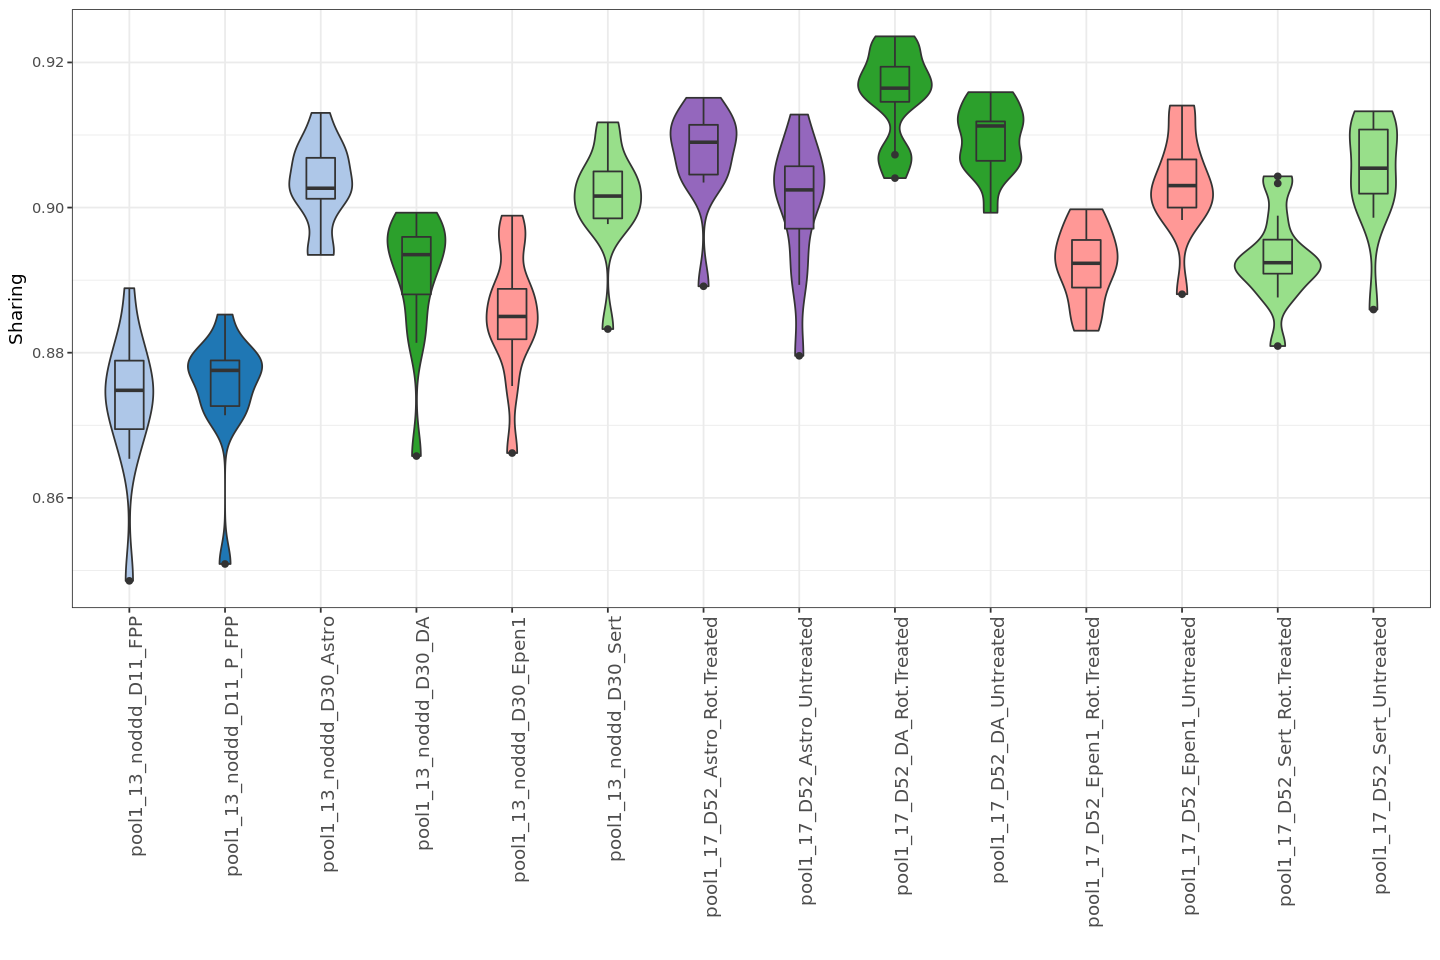

In [87]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(
#                     "gold","brown",
#                     col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Sert,col_Sert
                            ))+ 
theme_bw() + xlab("") +
theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

In [120]:
mat_to_plot = pairwiseSharingSign[c(29:41),c(52,2,4,6:12,14:15,17:18,20:21,41, 50)]
colnames(mat_to_plot)

[1] "iPSC"                           "iPSCsc"                        
 [3] "pool1_13_noddd_D11_FPP"         "pool1_13_noddd_D11_P_FPP"      
 [5] "pool1_13_noddd_D30_Astro"       "pool1_13_noddd_D30_DA"         
 [7] "pool1_13_noddd_D30_Epen1"       "pool1_13_noddd_D30_Sert"       
 [9] "pool1_17_D52_Astro_Rot.Treated" "pool1_17_D52_Astro_Untreated"  
[11] "pool1_17_D52_DA_Rot.Treated"    "pool1_17_D52_DA_Untreated"     
[13] "pool1_17_D52_Epen1_Rot.Treated" "pool1_17_D52_Epen1_Untreated"  
[15] "pool1_17_D52_Sert_Rot.Treated"  "pool1_17_D52_Sert_Untreated"   
[17] "Brain_Substantia_nigra"         "Heart_Atrial_Appendage"

In [121]:
df = as.data.frame(mat_to_plot) %>% 
  gather(key="CellType", value="Sharing")

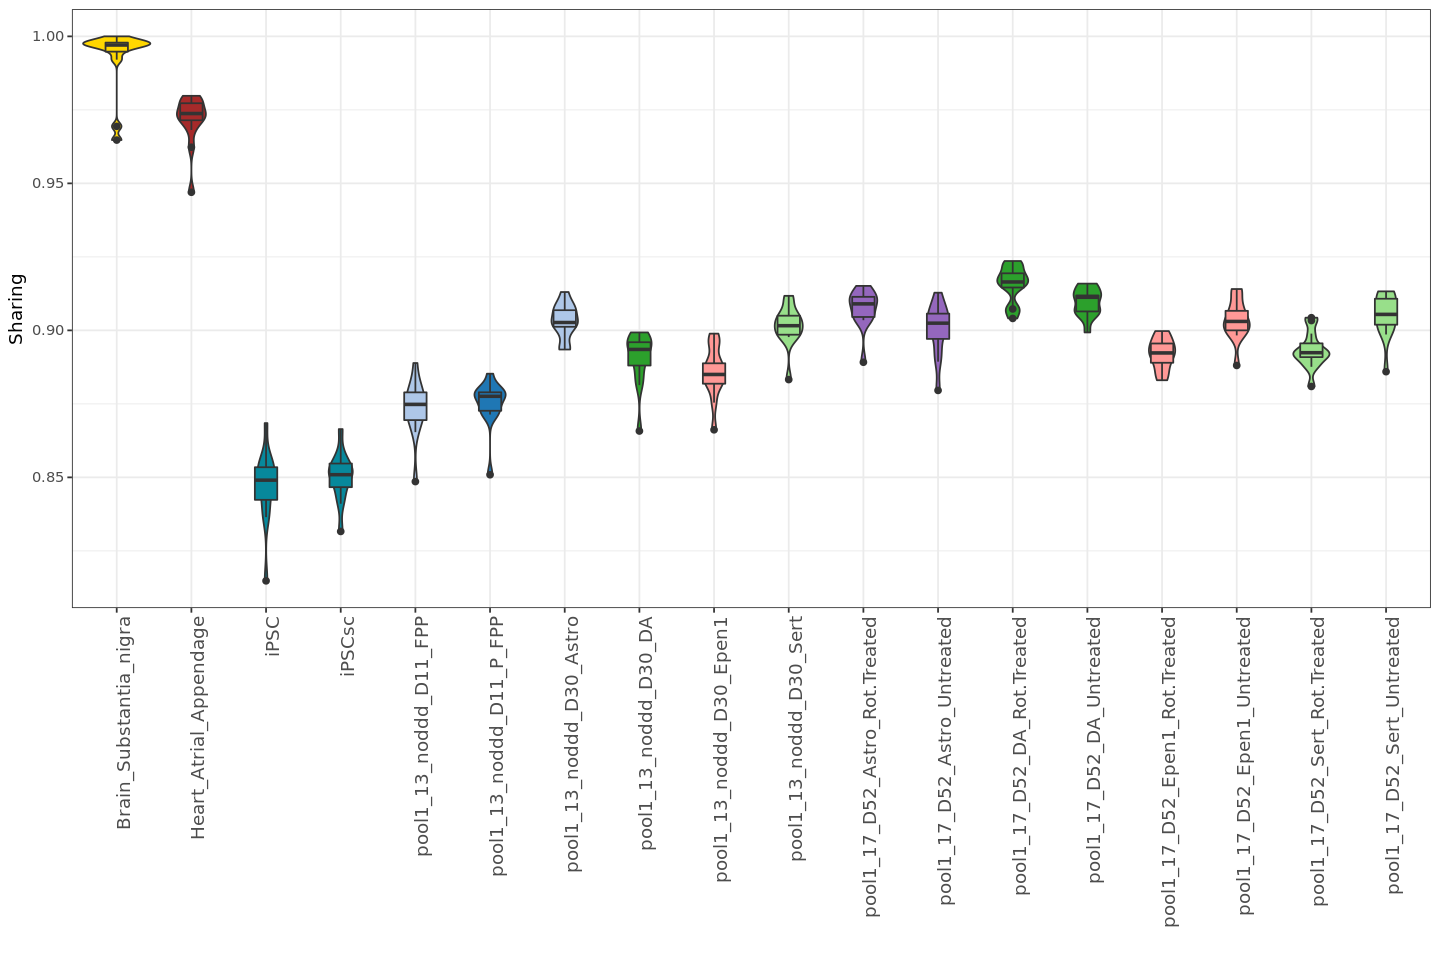

In [123]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(
                    "gold","brown",
                    col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Epen1,col_Sert,
                            col_Astro,col_Astro,col_DA,col_DA,
                            col_Epen1,col_Epen1,col_Sert,col_Sert
                            ))+ 
theme_bw() + xlab("") +
theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

In [42]:
df %>% mutate(CellType = factor(CellType, levels=c("iPSC","iPSCsc",
                                     "pool1_13_noddd_D11_FPP","pool1_13_noddd_D11_P_FPP",
                                    "pool1_13_noddd_D30_Astro","pool1_13_noddd_D30_DA","pool1_13_noddd_D30_Sert",
                                    "pool1_13_noddd_D30_Epen1","pool1_17_D52_DA_Untreated",
                                    "pool1_17_D52_Sert_Untreated","pool1_17_D52_Epen1_Untreated",
                                                   "pool1_17_D52_Astro_Untreated","pool1_17_D52_DA_Rot.Treated",
                                    "pool1_17_D52_Sert_Rot.Treated","pool1_17_D52_Epen1_Rot.Treated",
                                                   "pool1_17_D52_Astro_Rot.Treated",
                                                  'Brain_Amygdala','Brain_Anterior_cingulate_cortex_BA24',
                                                   'Brain_Caudate_basal_ganglia','Brain_Cerebellar_Hemisphere',
                                                   'Brain_Cerebellum','Brain_Cortex','Brain_Frontal_Cortex_BA9',
                                                   'Brain_Hippocampus','Brain_Hypothalamus',
                                                   'Brain_Nucleus_accumbens_basal_ganglia',
                                                   'Brain_Putamen_basal_ganglia',
                                                   'Brain_Spinal_cord_cervical_c.1','Brain_Substantia_nigra')))

CellType,Sharing
iPSC,0.8684547
iPSC,0.8563015
iPSC,0.8382199
iPSC,0.8364641
iPSC,0.8147967
iPSC,0.8423619
iPSC,0.8506080
iPSC,0.8548662
iPSC,0.8486731
iPSC,0.8531588


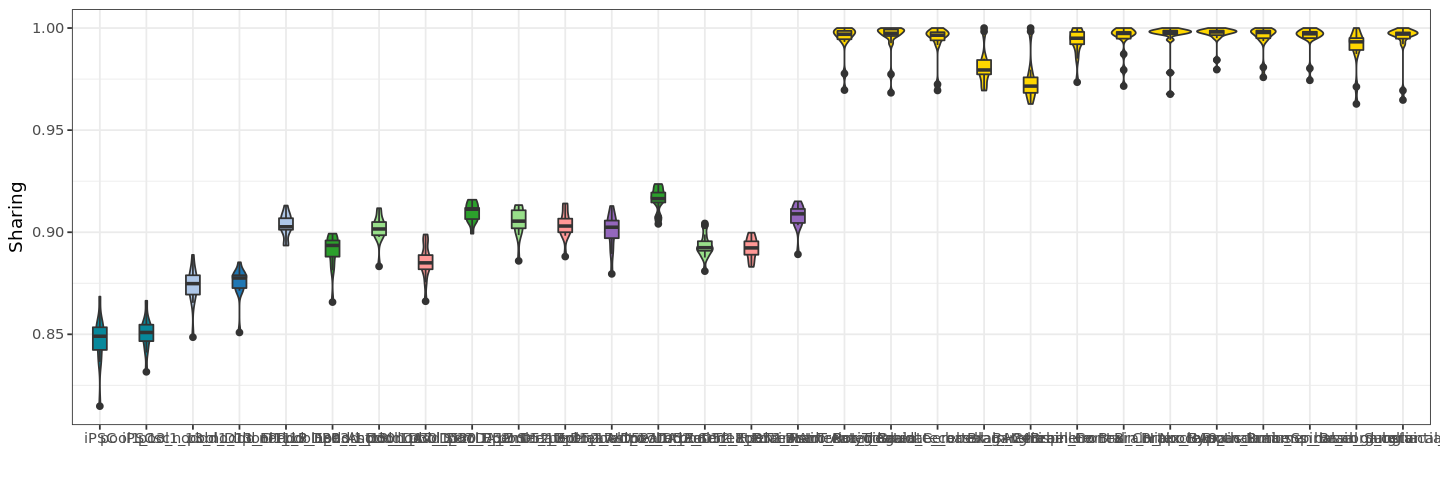

In [43]:
options(repr.plot.width=12, repr.plot.height=4)
ggplot(df,aes(x=factor(CellType, levels = c("iPSC","iPSCsc",
                                     "pool1_13_noddd_D11_FPP","pool1_13_noddd_D11_P_FPP",
                                    "pool1_13_noddd_D30_Astro","pool1_13_noddd_D30_DA","pool1_13_noddd_D30_Sert",
                                    "pool1_13_noddd_D30_Epen1","pool1_17_D52_DA_Untreated",
                                    "pool1_17_D52_Sert_Untreated","pool1_17_D52_Epen1_Untreated",
                                                   "pool1_17_D52_Astro_Untreated","pool1_17_D52_DA_Rot.Treated",
                                    "pool1_17_D52_Sert_Rot.Treated","pool1_17_D52_Epen1_Rot.Treated",
                                                   "pool1_17_D52_Astro_Rot.Treated",
                                                  'Brain_Amygdala','Brain_Anterior_cingulate_cortex_BA24',
                                                   'Brain_Caudate_basal_ganglia','Brain_Cerebellar_Hemisphere',
                                                   'Brain_Cerebellum','Brain_Cortex','Brain_Frontal_Cortex_BA9',
                                                   'Brain_Hippocampus','Brain_Hypothalamus',
                                                   'Brain_Nucleus_accumbens_basal_ganglia',
                                                   'Brain_Putamen_basal_ganglia',
                                                   'Brain_Spinal_cord_cervical_c.1','Brain_Substantia_nigra')), 
              y=Sharing, fill=factor(CellType, levels = c("iPSC","iPSCsc",
                                     "pool1_13_noddd_D11_FPP","pool1_13_noddd_D11_P_FPP",
                                    "pool1_13_noddd_D30_Astro","pool1_13_noddd_D30_DA","pool1_13_noddd_D30_Sert",
                                    "pool1_13_noddd_D30_Epen1","pool1_17_D52_DA_Untreated",
                                    "pool1_17_D52_Sert_Untreated","pool1_17_D52_Epen1_Untreated",
                                                   "pool1_17_D52_Astro_Untreated","pool1_17_D52_DA_Rot.Treated",
                                    "pool1_17_D52_Sert_Rot.Treated","pool1_17_D52_Epen1_Rot.Treated",
                                                   "pool1_17_D52_Astro_Rot.Treated",
                                                  'Brain_Amygdala','Brain_Anterior_cingulate_cortex_BA24',
                                                   'Brain_Caudate_basal_ganglia','Brain_Cerebellar_Hemisphere',
                                                   'Brain_Cerebellum','Brain_Cortex','Brain_Frontal_Cortex_BA9',
                                                   'Brain_Hippocampus','Brain_Hypothalamus',
                                                   'Brain_Nucleus_accumbens_basal_ganglia',
                                                   'Brain_Putamen_basal_ganglia',
                                                   'Brain_Spinal_cord_cervical_c.1','Brain_Substantia_nigra')))) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            "gold","gold","gold","gold","gold","gold","gold",
                            "gold","gold","gold","gold","gold","gold"))+ 
theme_bw() + xlab("") +
theme(legend.position = "none") 

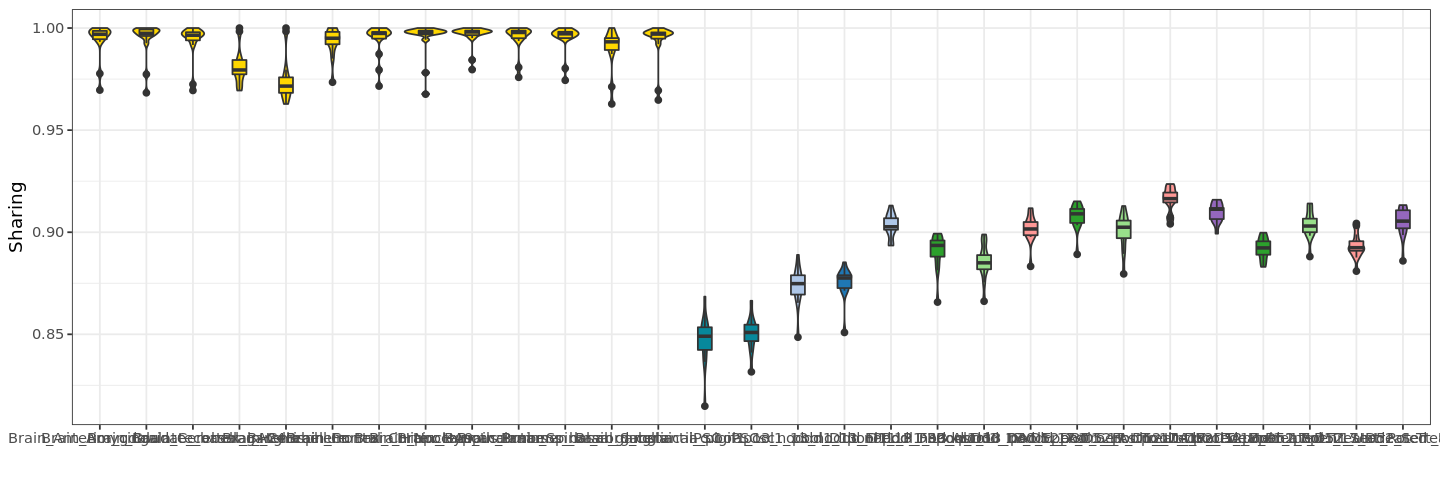

In [46]:
options(repr.plot.width=12, repr.plot.height=4)
ggplot(df,aes(x=CellType, y=Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.3) + 
                scale_fill_manual(values = c(
                    "gold",
                    col_ips,col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro
                            ))+ 
theme_bw() + xlab("") +
theme(legend.position = "none") 